In [14]:
from qiskit.circuit.library import QFT
from qiskit.quantum_info import Statevector
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_bloch_multivector
from itertools import product

Base computacional: |101>


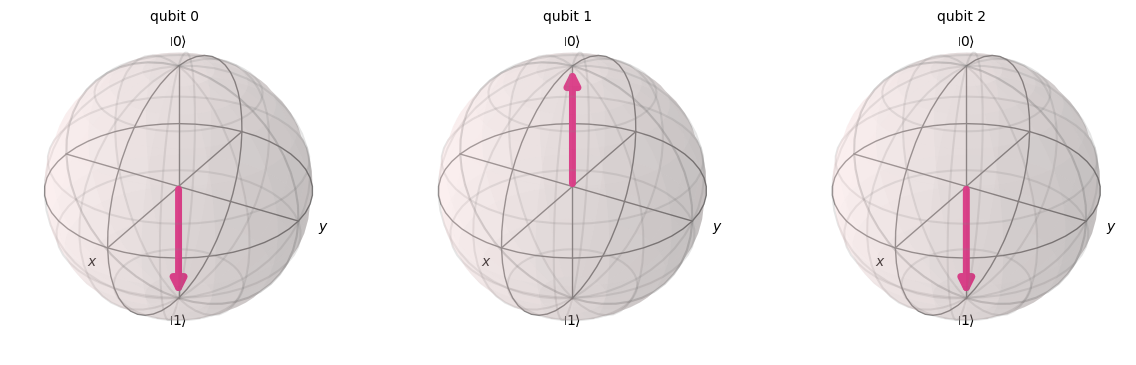

Base d Fourier: |101>


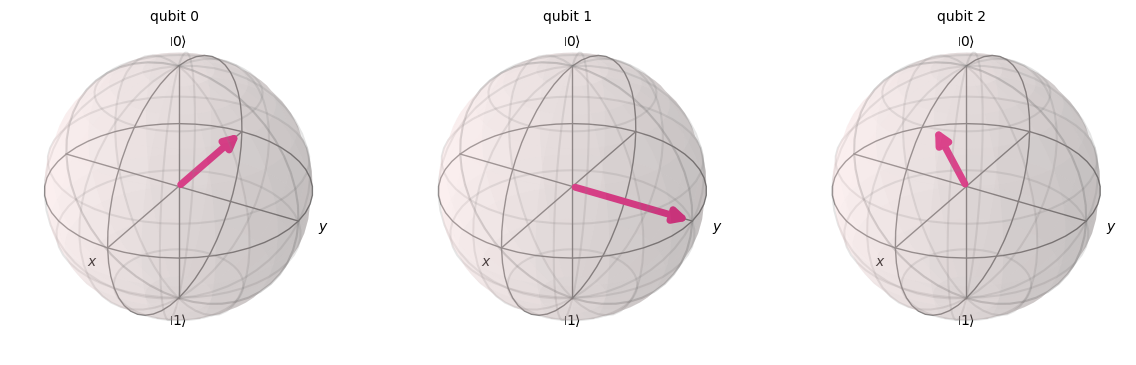

In [15]:
state = '101'
rev_state = state[::-1]

qc = QuantumCircuit(len(rev_state))
qc.initialize(Statevector.from_label(state), qc.qubits[::-1])
print(f"Base computacional: |{state}>")
display(plot_bloch_multivector(Statevector.from_label(rev_state).data))
print(f"Base d Fourier: |{state}>")
qc.append(QFT(len(rev_state), do_swaps=True) ,qc.qubits[::-1])
display(plot_bloch_multivector(Statevector.from_instruction(qc).data))

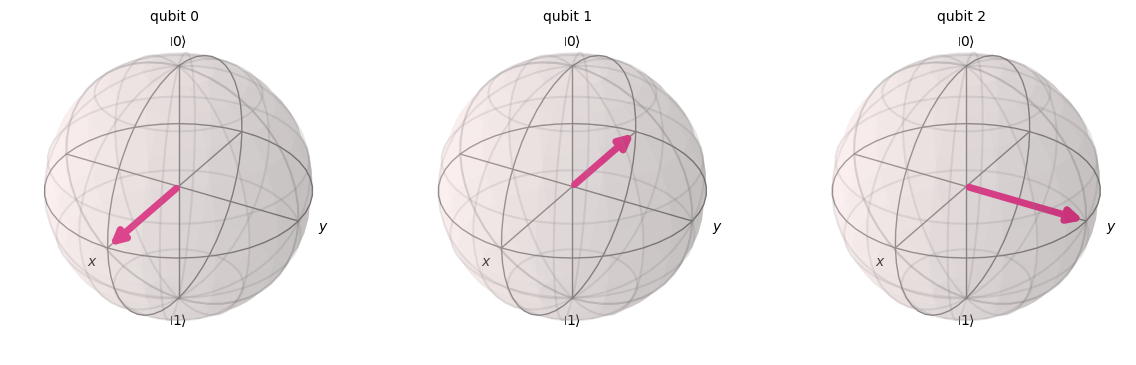

In [ ]:
from IPython.display import display, clear_output
import matplotlib.pyplot as plt

# Generar todas las combinaciones binarias de 4 bits
for state in product('01', repeat=3):
    state = ''.join(state)
    rev_state = state[::-1]

    # Circuito cuántico
    qc = QuantumCircuit(len(rev_state))
    qc.initialize(Statevector.from_label(state), qc.qubits[::-1])

    # Base computacional
    print(f"Base computacional: |{state}>")
    bloch_data = Statevector.from_label(rev_state).data
    clear_output(wait=True)  # Limpiar la salida previa
    display(plot_bloch_multivector(bloch_data))
    plt.pause(1)  # Pausa para visualizar la gráfica

    # Base de Fourier
    print(f"Base de Fourier: |{state}>")
    qc.append(QFT(len(rev_state), do_swaps=True), qc.qubits[::-1])
    bloch_data_fourier = Statevector.from_instruction(qc).data
    clear_output(wait=True)  # Limpiar la salida previa
    display(plot_bloch_multivector(bloch_data_fourier))
    plt.pause(3)  # Pausa para visualizar la gráfica